In [1]:
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import os

drive.mount('/content/gdrive')

train_datas = os.listdir("/content/gdrive/My Drive/data/blur/")
train_labels = os.listdir("/content/gdrive/My Drive/data/clean/")
train_datas.sort()
train_labels.sort()

train_data = []
train_label = []

for i in range(len(train_datas)):
  train_data.append(cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/blur/"+train_datas[i]),cv2.COLOR_BGR2RGB))
  train_label.append(cv2.cvtColor(cv2.imread("/content/gdrive/My Drive/data/clean/"+train_labels[i]),cv2.COLOR_BGR2RGB))

train_data = np.array(train_data).astype(int)
train_label = np.array(train_label).astype(int)

x_train = train_data[:7]
y_train = train_label[:7]
val_x = train_data[7:]
val_y = train_label[7:]


print(train_data.shape)
print(train_label.shape)

deblur_CNN_input = Input(shape=(64,64,3))

#HIDDEN LAYERS
deblur_CNN_layer1 = Conv2D(filters=128, kernel_size=10, strides = 1, padding='same')(deblur_CNN_input)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer1)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer1)

deblur_CNN_layer2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer1)
deblur_CNN_layer2 = BatchNormalization()(deblur_CNN_layer2)
deblur_CNN_layer2 = Activation('relu')(deblur_CNN_layer2)

deblur_CNN_layer3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer2)
deblur_CNN_layer1 = BatchNormalization()(deblur_CNN_layer3)
deblur_CNN_layer1 = Activation('relu')(deblur_CNN_layer3)

deblur_CNN_layer4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer3)
deblur_CNN_layer4 = BatchNormalization()(deblur_CNN_layer4)
deblur_CNN_layer4 = Activation('relu')(deblur_CNN_layer4)

deblur_CNN_layer5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer4)
deblur_CNN_layer5 = BatchNormalization()(deblur_CNN_layer5)
deblur_CNN_layer5 = Activation('relu')(deblur_CNN_layer5)

deblur_CNN_layer6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer5)
deblur_CNN_layer6 = BatchNormalization()(deblur_CNN_layer6)
deblur_CNN_layer6 = Activation('relu')(deblur_CNN_layer6)

deblur_CNN_layer7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer6)
deblur_CNN_layer7 = BatchNormalization()(deblur_CNN_layer7)
deblur_CNN_layer7 = Activation('relu')(deblur_CNN_layer7)

deblur_CNN_layer8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer7)
deblur_CNN_layer8 = BatchNormalization()(deblur_CNN_layer8)
deblur_CNN_layer8 = Activation('relu')(deblur_CNN_layer8)

deblur_CNN_layer9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer8)
deblur_CNN_layer9 = BatchNormalization()(deblur_CNN_layer9)
deblur_CNN_layer9 = Activation('relu')(deblur_CNN_layer9)

deblur_CNN_layer10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(deblur_CNN_layer9)
deblur_CNN_layer10 = BatchNormalization()(deblur_CNN_layer10)
deblur_CNN_layer10 = Activation('relu')(deblur_CNN_layer10)

deblur_CNN_layer11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer10)
deblur_CNN_layer11 = BatchNormalization()(deblur_CNN_layer11)
deblur_CNN_layer11 = Activation('relu')(deblur_CNN_layer11)

deblur_CNN_layer12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(deblur_CNN_layer11)
deblur_CNN_layer12 = BatchNormalization()(deblur_CNN_layer12)
deblur_CNN_layer12 = Activation('relu')(deblur_CNN_layer12)

deblur_CNN_layer13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(deblur_CNN_layer12)
deblur_CNN_layer13 = BatchNormalization()(deblur_CNN_layer13)
deblur_CNN_layer13 = Activation('relu')(deblur_CNN_layer13)

deblur_CNN_layer14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(deblur_CNN_layer13)
deblur_CNN_layer14 = BatchNormalization()(deblur_CNN_layer14)
deblur_CNN_layer14 = Activation('relu')(deblur_CNN_layer14)

deblur_CNN_output = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(deblur_CNN_layer14)

deblur_CNN = Model(inputs= deblur_CNN_input, outputs=deblur_CNN_output )
deblur_CNN.summary()


adam = Adam(lr= 0.00001)
deblur_CNN.compile(optimizer=adam,
              loss='mean_squared_error',
              metrics=['accuracy'])
deblur_CNN.load_weights('/content/gdrive/My Drive/celebA_deblur_cnn_weights.h5')

'''history = deblur_CNN.fit(train_data,
                    train_label,
                    epochs=5,
                    batch_size=100)
                    #validation_data=(val_x,val_y))'''

Deblurred = deblur_CNN.predict(x_train)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
(10, 64, 64, 3)
(10, 64, 64, 3)


Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       38528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 320)       0   

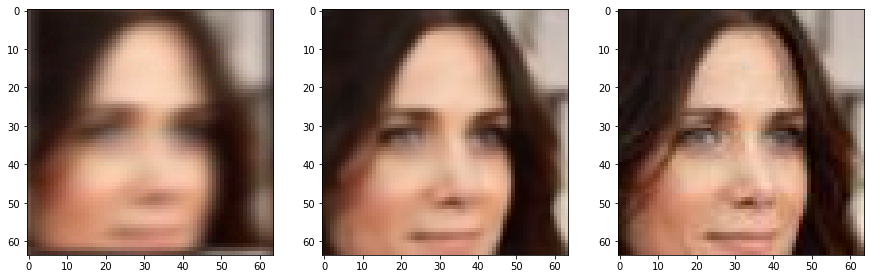

In [3]:
_,pos = plt.subplots(nrows=1, ncols=3, figsize=(15,15))     # image visualization
pos[0].imshow(train_data[2]/255)
pos[1].imshow(Deblurred[2]/255)
pos[2].imshow(train_label[2]/255)

plt.show()


In [5]:
def PSNR(img1, img2):
    h, w, c = img1.shape
    PIXEL_MAX = 255.0
    mse = np.sum((img1-img2)**2)/(h*w*c)
    print("MSE:",mse)

    if mse == 0:
        return 100
    else:
        return 10*math.log10(math.pow(PIXEL_MAX,2)/mse)
    

original = train_label[0]   # train data
contrast1 = train_data[0]   # model output
contrast2 = Deblurred[0]    # clean image (label)

result1 = PSNR(original, contrast1)
result2 = PSNR(original, contrast2)
print("PSNR result1 :",result1)
print("PSNR result2 :",result2)

MSE: 449.9391276041667
MSE: 119.35170372358441
PSNR result1 : 21.59926598945531
PSNR result2 : 27.362517380071623
